In [41]:
using MAT
using LinearAlgebra
vars = matread("/Users/user/Documents/Projects/python_util/test/data/LST_template.mat")

Dict{String, Any} with 4 entries:
  "B"     => [1.0 1.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … -0.999966 1.0…
  "A"     => ComplexF64[0.0-200.0im 0.0-200.0im … -0.0+0.0im -0.0+0.0im; 0.0-0.…
  "omega" => ComplexF64[0.666627-49.3447im; 0.666626-46.1096im; … ; 0.667887-6.…
  "q"     => ComplexF64[0.118699+0.881301im 0.112337+0.887663im … 0.0+0.0im 0.0…

In [42]:
T = inv(vars["B"]) * vars["A"]
lambda = eigvals(T)
vecs = eigvecs(T)

1152×1152 Matrix{ComplexF64}:
         0.0-0.0im          …  0.0+0.0im     0.187905+0.145684im
         0.0-0.0im             0.0+0.0im     0.968975+0.0im
         0.0-0.0im             0.0+0.0im    0.0443659+0.0216235im
         0.0-0.0im             0.0+0.0im    0.0340034+0.00235871im
         0.0-0.0im             0.0+0.0im   0.00467092-0.0102688im
         0.0-0.0im          …  0.0+0.0im  -0.00386434+0.00251234im
         0.0-0.0im             0.0+0.0im   0.00332229-0.0106606im
         0.0-0.0im             0.0+0.0im  -0.00403616+0.00258741im
         0.0-0.0im             0.0+0.0im   0.00261275-0.0102746im
         0.0-0.0im             0.0+0.0im  -0.00365252+0.0026608im
            ⋮               ⋱     ⋮       
    0.125009-1.08419e-13im     0.0+0.0im          0.0+0.0im
 1.56018e-10-7.24993e-15im     0.0+0.0im          0.0+0.0im
    0.125255-7.21186e-14im  …  0.0+0.0im          0.0+0.0im
 1.56278e-10-7.26278e-15im     0.0+0.0im          0.0+0.0im
    0.125432-3.59549e-14im     

In [43]:
omega = 1im*lambda   # eigenvalues omega in vector form


sp = (abs.(omega) .> 1e-10) .* ( abs.(omega) .<50)

omega = omega[sp]
vecs = vecs[:, sp]

1152×169 Matrix{ComplexF64}:
 0.0+0.0im      0.599832+0.0im          …  0.0+0.0im
 0.0+0.0im    1.1719e-11+6.57165e-11im     0.0+0.0im
 0.0+0.0im     0.0458718+0.00464914im      0.0+0.0im
 0.0+0.0im  -1.18226e-12+6.89885e-12im     0.0+0.0im
 0.0+0.0im    -0.0952772+2.8778e-5im       0.0+0.0im
 0.0+0.0im  -5.10896e-12-5.32941e-12im  …  0.0+0.0im
 0.0+0.0im     -0.106483-0.000177117im     0.0+0.0im
 0.0+0.0im  -1.83906e-13-2.60942e-12im     0.0+0.0im
 0.0+0.0im     -0.116305-0.000208232im     0.0+0.0im
 0.0+0.0im  -1.37789e-13-4.24937e-14im     0.0+0.0im
    ⋮                                   ⋱  
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im          …  0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0

In [44]:
omega - vars["omega"]

169×1 Matrix{ComplexF64}:
    9.652307121776893e-5 - 0.008459905255357114im
   1.1082051638577894e-6 - 3.2350696827229797im
   0.0001307145366969964 - 5.290020409033168im
  0.00010648661181866803 - 7.7534474766551895im
   -4.571143175091663e-8 - 1.0071477873907497e-7im
   0.0001411549125882594 - 9.300477575737439im
  0.00011752490327643361 - 11.852148310296982im
 -0.00019207877742333235 - 1.582535449214575im
   -9.801075364079814e-5 - 3.085161770947913im
   0.0002123180105040312 - 12.94793292028162im
                         ⋮
     0.07214545199507794 + 22.034890685526634im
    -0.12278895740492846 + 12.77333431116458im
     0.06743121839882182 + 19.539930016135894im
      0.1577069547245713 + 14.943573895505248im
    0.024682463761755646 + 17.217922038819527im
      0.1718900502677988 + 10.963102862555619im
    -0.23283088859908602 + 9.222914185964356im
     0.26966990536666613 + 6.195046956072681im
     0.27917082663970527 + 7.670385913014285im

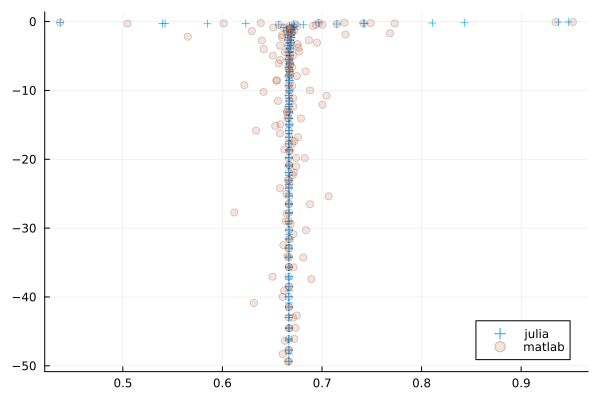

In [57]:
using Plots
scatter(real(omega), imag(omega), label="julia", markeralpha=0.8, marker=:cross)
scatter!(real(vars["omega"]), imag(vars["omega"]), label="matlab", markeralpha=0.2)